# Context Plots
Plots show ALHIC1901 228_4 and 230_4 data in the context of other core data, and relative to each other.

## Import Packages

In [1]:
# general
import numpy as np
from tqdm import tqdm
import pandas as pd

# plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Setup

In [2]:
# Set filepaths

path_to_data = '../../data/'
path_to_samples = '../../data/sampling/master/'
path_to_angles = '../../data/angles/'
path_to_figures = '../../../figures/'

## Load data

In [3]:
# load sample data
samps = ['water_iso','cc','ic_icpms','cfa','ghg']

# loop through and load all sample files
for s in samps:

    if s == samps[0]:
        samp_data = pd.read_csv(path_to_samples + s+'_master.csv')

    else:

        df = pd.read_csv(path_to_samples + s+'_master.csv')
        samp_data = pd.concat([samp_data, df], ignore_index=True)


samp_data.head()

,section,stick,top_depth,bottom_depth,mid_depth,dD,d17O,d18O,dxs,x_lo,...,K,Be,W,Si,Liquid Conductivity,Dust Concentration,CPP,co2,ch4,tac
0,228_4,l_iso,155.0650,155.0750,155.0700,-296.18,-19.70,-37.03,0.07,-0.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,228_4,l_iso,155.0761,155.0861,155.0811,-295.74,-19.69,-36.96,-0.05,-0.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,228_4,l_iso,155.0873,155.0973,155.0923,-295.99,-19.72,-37.05,0.40,-0.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,228_4,l_iso,155.0984,155.1084,155.1034,-296.24,-19.80,-37.22,1.49,-0.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,228_4,l_iso,155.1095,155.1195,155.1145,-296.55,-19.90,-37.40,2.62,-0.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# load median data
med_data = pd.read_csv(path_to_samples + 'ecm_median_master.csv')

# make a new empty df
downsampled = pd.DataFrame()

for sec in med_data['section'].unique():

    # filter data for the current section
    sec_data = med_data[med_data['section'] == sec]

    # downsample ecm from 1mm to 1cm
    min_depth = sec_data['top_depth_adj'].min()
    max_depth = sec_data['bottom_depth_adj'].max()
    min_depth = np.round(min_depth, 2)
    max_depth = np.round(max_depth, 2)
    depth_range = np.arange(min_depth, max_depth, 0.01)


    for i in range(len(depth_range)-1):

        filtered_data = sec_data[(sec_data['top_depth_adj'] > depth_range[i]) & (sec_data['top_depth_adj'] < depth_range[i+1])]

        # add a new row to downsampled dataframe. include AC_ecm column, section, and stick
        if len(filtered_data) > 0:
            new_row = pd.DataFrame({
                'section': [sec],
                'top_depth_adj': [depth_range[i]],
                'bottom_depth_adj': [depth_range[i+1]],
                'AC_ecm': [filtered_data['AC_ecm'].mean()],
                'x_lo': [filtered_data['x_lo'].mean()],
                'x_hi': [filtered_data['x_hi'].mean()],
                'y_lo': [filtered_data['y_lo'].mean()],
                'y_hi': [filtered_data['y_hi'].mean()],
                'effective_center_x': [filtered_data['effective_center_x'].mean()],
                'effective_center_y': [filtered_data['effective_center_y'].mean()],
                'stick': 'median'
            })
            downsampled = pd.concat([downsampled, new_row], ignore_index=True)
    

samp_data = pd.concat([samp_data,downsampled], ignore_index=True)




In [5]:
downsampled

,section,top_depth_adj,bottom_depth_adj,AC_ecm,x_lo,x_hi,y_lo,y_hi,effective_center_x,effective_center_y,stick
0,228_4,155.03,155.04,1.595118e-08,0.0,0.0,0.0,0.0,0.0,0.0,median
1,228_4,155.04,155.05,1.522444e-08,0.0,0.0,0.0,0.0,0.0,0.0,median
2,228_4,155.05,155.06,1.470650e-08,0.0,0.0,0.0,0.0,0.0,0.0,median
3,228_4,155.06,155.07,1.396608e-08,0.0,0.0,0.0,0.0,0.0,0.0,median
4,228_4,155.07,155.08,1.364151e-08,0.0,0.0,0.0,0.0,0.0,0.0,median
...,...,...,...,...,...,...,...,...,...,...,...
15570,230_4,157.01,157.02,1.712633e-08,0.0,0.0,0.0,0.0,0.0,0.0,median
15571,230_4,157.02,157.03,1.721649e-08,0.0,0.0,0.0,0.0,0.0,0.0,median
15572,230_4,157.03,157.04,1.707756e-08,0.0,0.0,0.0,0.0,0.0,0.0,median
15573,230_4,157.04,157.05,1.693640e-08,0.0,0.0,0.0,0.0,0.0,0.0,median


In [6]:
# load context data
context_data = pd.read_csv(path_to_data + 'broader_context/broader_context_clean.csv')

In [7]:
# load unit data
units = pd.read_excel(path_to_data+'sampling/units.xlsx')

## Define Functions

In [8]:
def common_interval(data,prox1,prox2):
    """
    Function to get two different datasets onto a common depth scale

    Parameters
    ----------
    samp_data : pandas.DataFrame
        Dataframe containing the data to be compared
    prox1 : str
        Column name of the first dataset. We will use this as the target depth frame
    prox2 : str
        Column name of the second dataset
    
    Returns
    -------
    df  : pandas.DataFrame
        Dataframe containing the common depth scale and the values of the two datasets
    """

    # get subset of dataframe where the prox1 column is not nan
    p1_data = data[samp_data[prox1].notna()]
    p2_data = data[samp_data[prox2].notna()]

    # make finiely (0.1 mm) spaced depth scale
    d_min = min(p1_data['top_depth_adj'].min(), p2_data['top_depth_adj'].min())
    d_max = max(p1_data['bottom_depth_adj'].max(), p2_data['bottom_depth_adj'].max())
    d_common = np.arange(np.round(d_min,3), np.round(d_max,3), 0.001)

    # interpolate both datasets onto finely spaced common depth vector
    p1_val = []
    p2_val = []
    for d in d_common:

        # find row in p2_data where the top depth is less than the common depth and bottom depth is greater than the common depth
        p2_row = p2_data[(p2_data['top_depth_adj'] <= d) & (p2_data['bottom_depth_adj'] >= d)]

        # if there is a row in p2_data, get the values and add to the common dataframe
        if len(p2_row) > 0:

            # get the values from the row
            p2_val.append(p2_row[prox2].values[0])
        else:
            p2_val.append(np.nan)

    # now caluclate the average value of p1_data between 'top_depth_adj' and 'bottom_depth_adj' in p2_data
    new_p2_val = []
    for index, row in p1_data.iterrows():

        #idx = np.where((d_common >= row['top_depth_adj']) & (d_common <= row['bottom_depth_adj']))

        idx1 = d_common >= row['top_depth_adj']
        idx2 = d_common <= row['bottom_depth_adj']
        idx = np.logical_and(idx1, idx2)

        p2 = np.array(p2_val)[idx]

        new_p2_val.append(np.nanmean(p2))
        
    # now add the new p2_val to the p1_data dataframe
    p1_data[prox2] = new_p2_val

    # now only keep the important columns of the dataframe
    col = ['section','stick','top_depth_adj','bottom_depth_adj','mid_depth_adj',prox1,prox2]
    p1_data = p1_data[col]
        
    return p1_data


In [9]:
def plot_scatter(data,prox1,prox2,units,flipx=False):
    """
    Function to plot a scatter plot of two different datasets
    Parameters
    ----------
    data : pandas.DataFrame
        Dataframe containing the data to be compared
    prox1 : str
        Column name of the first dataset. We will use this as the target depth frame
    prox2 : str
        Column name of the second dataset
    flipx : bool
        If True, make prox2 the x axis and prox1 the y axis

    Returns
    -------
    fig : matplotlib.figure.Figure
        Figure object containing the scatter plot
    ax : matplotlib.axes._axes.Axes
        Axes object containing the scatter plot
    """

    # get the common depth scale for the two datasets
    if prox1  in data.columns and prox2  in data.columns:
        df = common_interval(data,prox1,prox2)

    # flip axis for plotting now that we've put on a common depth scale
    
    if flipx == True:
        prox1, prox2 = prox2, prox1

    # Define colors for each section
    section_colors = {'228_4': 'black', '230_4': 'green'}
    section_shapes = {
        '228_4': '^',
        '230_4': 's'
    }

    # make figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the 228_4 and 230_4 data
    if prox1  in data.columns and prox2  in data.columns:

        for section in df['section'].unique():

            section_df = df[df['section'] == section]
            
            ax.plot(
                section_df[prox1],
                section_df[prox2],
                color=section_colors[section],
                marker=section_shapes[section],
                markersize=7,
                linestyle='None',
                label=section
            )
            
    # look up fancy name and units
    unit_row = units.loc[units['simple_name'] == prox1]
    if len(unit_row) == 1:
        x_full_name = unit_row.latex_name.iloc[0]
        x_unit = unit_row.units.iloc[0]
    else:
        x_full_name = prox1
        x_unit = ''
    unit_row = units.loc[units['simple_name'] == prox2]
    if len(unit_row) == 1:
        y_full_name = unit_row.latex_name.iloc[0]
        y_unit = unit_row.units.iloc[0]
    else:
        y_full_name = prox2
        y_unit = ''

    ax.set_xlabel(x_full_name + ' (' + x_unit + ')')
    ax.set_ylabel(y_full_name + '(' + y_unit + ')')
    ax.set_title(x_full_name + ' and '+y_full_name)

    # add a legend
    ax.legend(loc='upper left', fontsize=12, markerscale=0.7)

    return fig, ax

In [10]:
def plot_scatter_withbroader(data,prox1,prox2,units,broader_context,flipx=False):
    """
    Function to plot a scatter plot of two different datasets
    Parameters
    ----------
    data : pandas.DataFrame
        Dataframe containing the data to be compared
    prox1 : str
        Column name of the first dataset. We will use this as the target depth frame
    prox2 : str
        Column name of the second dataset
    flipx : bool
        If True, make prox2 the x axis and prox1 the y axis
    broader_context : pandas.DataFrame
        Dataframe containing the broader context data. If None, do not plot the broader context data
    Returns
    -------
    fig : matplotlib.figure.Figure
        Figure object containing the scatter plot
    ax : matplotlib.axes._axes.Axes
        Axes object containing the scatter plot
    """

    # get the common depth scale for the two datasets
    if prox1  in data.columns and prox2  in data.columns:
        df = common_interval(data,prox1,prox2)

    # flip axis for plotting now that we've put on a common depth scale
    
    if flipx == True:
        prox1, prox2 = prox2, prox1

    # Define colors for each section
    section_colors = {'228_4': 'black', '230_4': 'green'}
    section_shapes = {
        '228_4': '^',
        '230_4': 's'
    }

    # make figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the broader context data 
    # plot the broader context data (filter out rows with NaNs in prox1 or prox2)
    bc = broader_context.dropna(subset=[prox1, prox2])
    ax.scatter(
        bc[prox1],
        bc[prox2],
        c=bc['top_depth'],
        cmap='coolwarm',
        alpha=0.5,
        label='Other Data',
        s=18
    )

    # Add a colorbar for the depth from the broader context data
    norm = plt.Normalize(130, 160)  # Flip the range to reverse the colorbar
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Depth (m)')
    cbar.ax.invert_yaxis()

    # # plot the broader context data
    # for index, row in broader_context.iterrows():
    #     if index == broader_context.index[0]:
    #         label = 'Broader Context'
    #     else:
    #         label = ''
    #     ax.plot(
    #         row[prox1],
    #         row[prox2],
    #         color = sm.to_rgba(row['top_depth'],alpha=None),  # No alpha specified, just RGB
    #         alpha=0.8,
    #         marker = 'o',
    #         markersize=4,
    #         linestyle='None',
    #         label = label
    #     )

    # plot the 228_4 and 230_4 data
    if prox1  in data.columns and prox2  in data.columns:

        for section in df['section'].unique():

            section_df = df[df['section'] == section]

            # for index, row in section_df.iterrows():

            #     if index == section_df.index[0]:
            #         label = section
            #     else:
            #         label = ''

            #     ax.plot(
            #         row[prox1],
            #         row[prox2],
            #         color=sm.to_rgba(row['mid_depth_adj'], alpha=None),  # No alpha specified, just RGB
            #         marker=section_shapes[section],
            #         markersize=7,
            #         linestyle='None',
            #         label=label
            #     )


            ax.plot(
                section_df[prox1],
                section_df[prox2],
                color=section_colors[section],
                #color=sm.to_rgba(section_df['mid_depth_adj']),
                marker=section_shapes[section],
                markersize=7,
                linestyle='None',
                label=section
            )

    # look up fancy name and units
    unit_row = units.loc[units['simple_name'] == prox1]
    if len(unit_row) == 1:
        x_full_name = unit_row.latex_name.iloc[0]
        x_unit = unit_row.units.iloc[0]
    else:
        x_full_name = prox1
        x_unit = ''
    unit_row = units.loc[units['simple_name'] == prox2]
    if len(unit_row) == 1:
        y_full_name = unit_row.latex_name.iloc[0]
        y_unit = unit_row.units.iloc[0]
    else:
        y_full_name = prox2
        y_unit = ''

    ax.set_xlabel(x_full_name + ' (' + x_unit + ')')
    ax.set_ylabel(y_full_name + '(' + y_unit + ')')
    ax.set_title(x_full_name + ' and '+y_full_name)

    # add a legend
    ax.legend(loc='upper left', fontsize=8, markerscale=1.1, framealpha=0.8, 
            fancybox=True, shadow=True)

    return fig, ax

## Make Plots

In [11]:
df = samp_data[samp_data['Mg'].notna()]
df

,section,stick,top_depth,bottom_depth,mid_depth,dD,d17O,d18O,dxs,x_lo,...,Be,W,Si,Liquid Conductivity,Dust Concentration,CPP,co2,ch4,tac,AC_ecm
147,228_4,ICPMS,155.083000,155.114000,155.098500,NaN,NaN,NaN,NaN,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,228_4,ICPMS,155.115000,155.146000,155.130500,NaN,NaN,NaN,NaN,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,228_4,ICPMS,155.147000,155.184500,155.165750,NaN,NaN,NaN,NaN,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,228_4,ICPMS,155.185500,155.215500,155.200500,NaN,NaN,NaN,NaN,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,228_4,ICPMS,155.216500,155.247000,155.231750,NaN,NaN,NaN,NaN,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,228_4,ICPMS,155.248000,155.285000,155.266500,NaN,NaN,NaN,NaN,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,228_4,ICPMS,155.286000,155.328000,155.307000,NaN,NaN,NaN,NaN,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,230_4,stick2,156.815200,156.830494,156.822847,NaN,NaN,NaN,NaN,0.031,...,2.892,7.546,107.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,230_4,stick2,156.830494,156.842998,156.836746,NaN,NaN,NaN,NaN,0.031,...,2.277,8.893,100.749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,230_4,stick2,156.842998,156.856403,156.849700,NaN,NaN,NaN,NaN,0.031,...,3.423,12.297,170.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


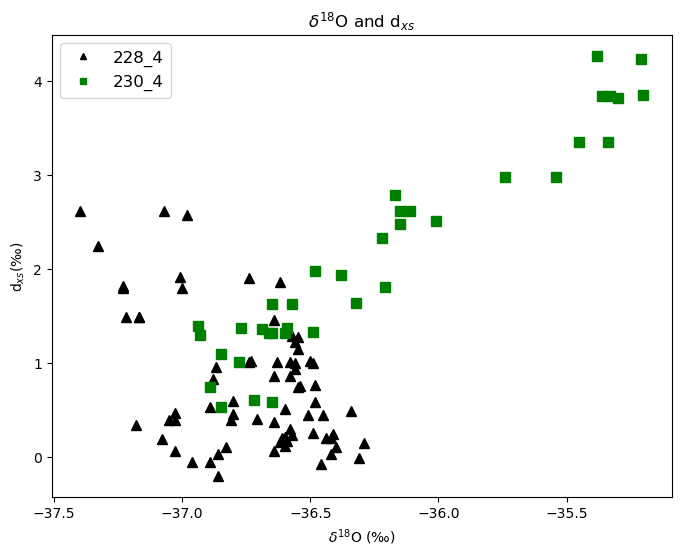

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


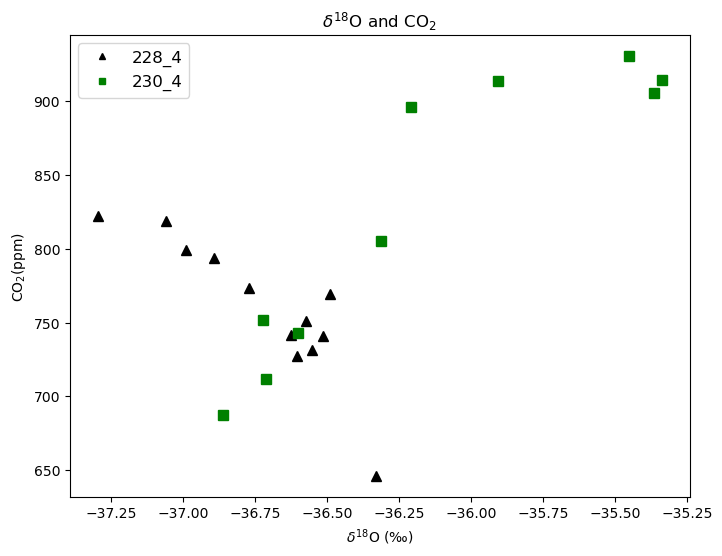

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


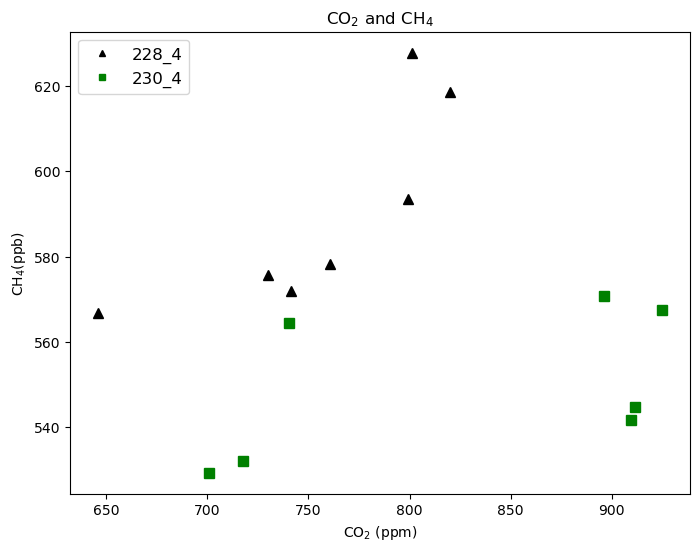

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


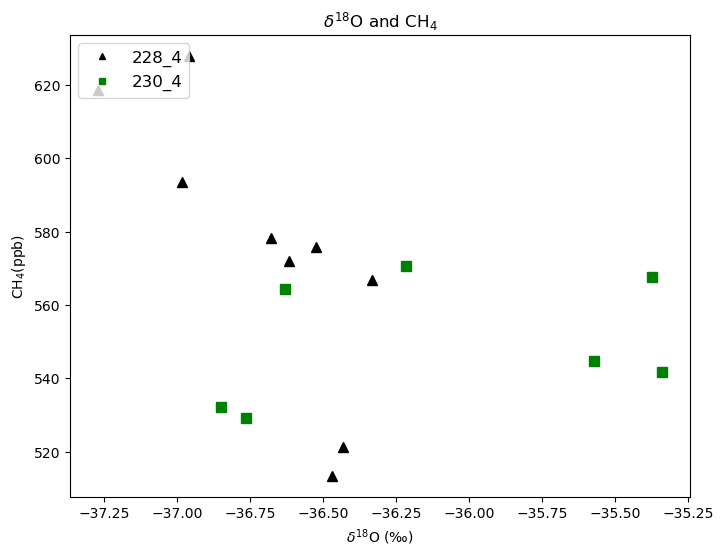

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


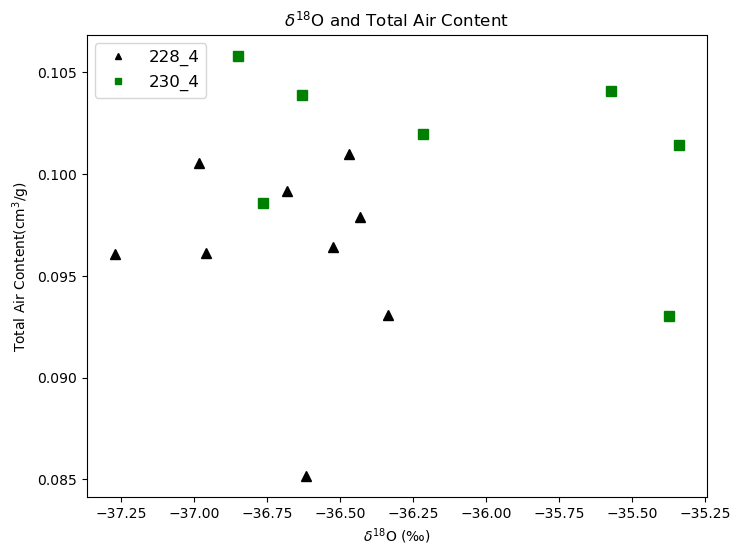

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


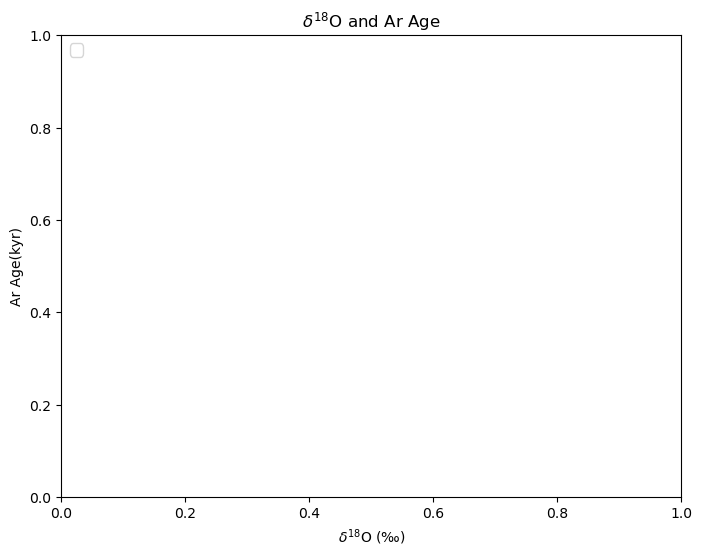

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


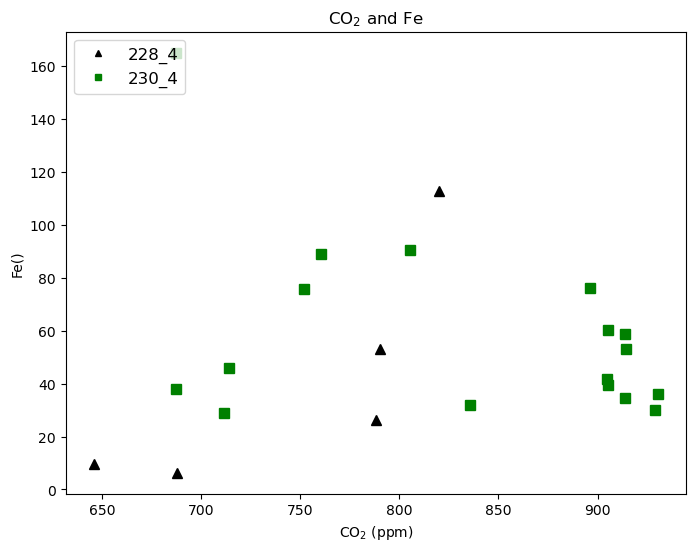

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


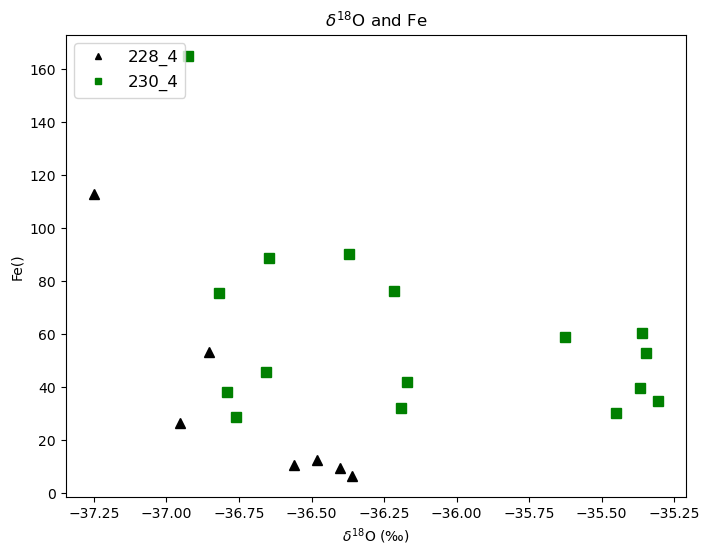

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


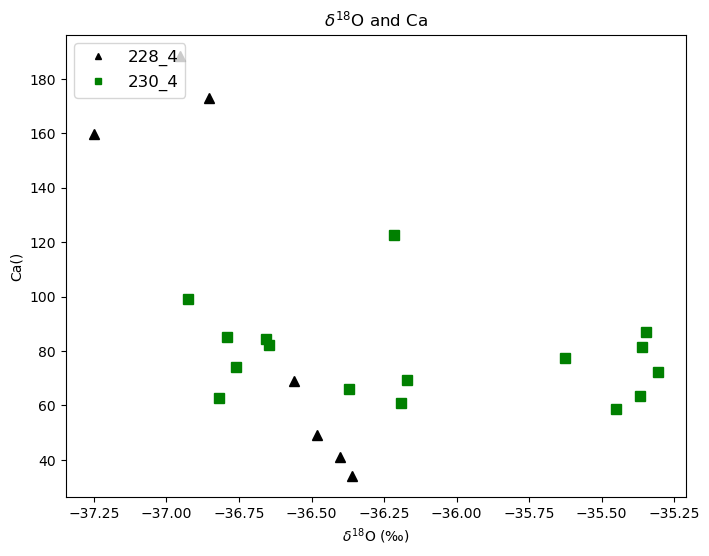

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


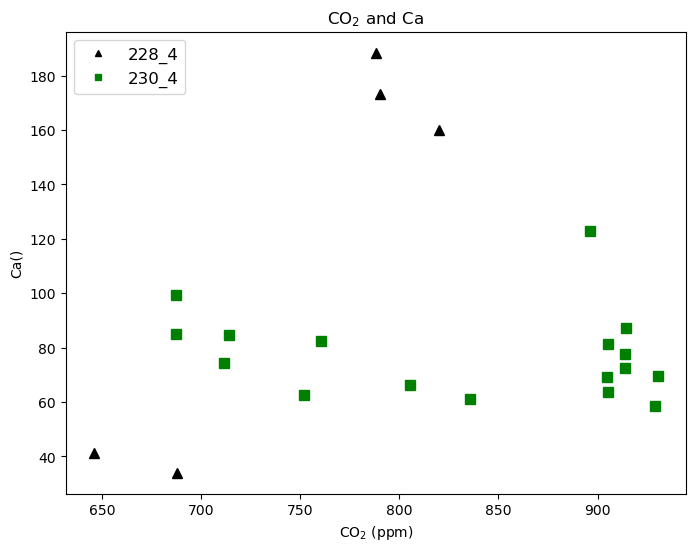

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


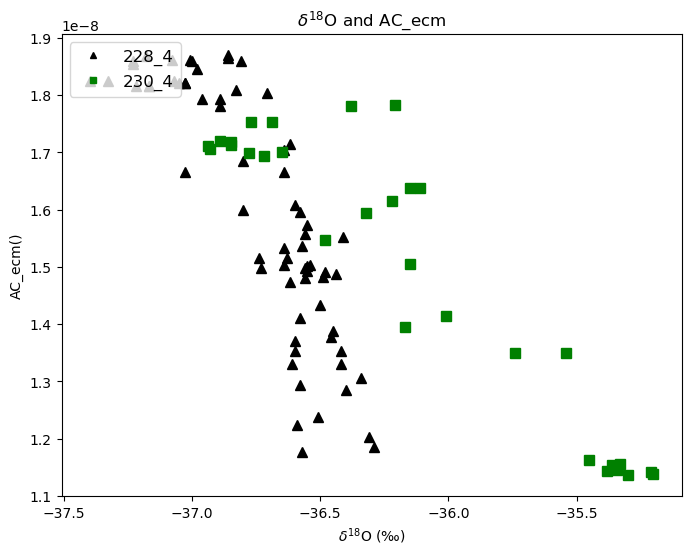

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val


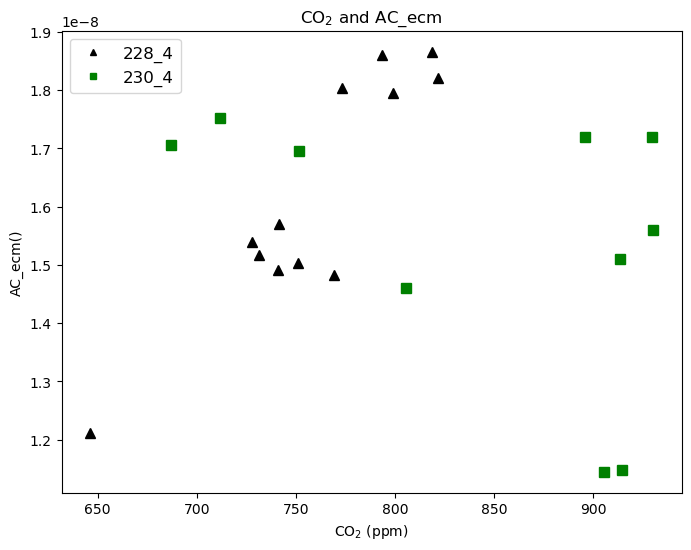

In [12]:
combos = [
    ['d18O','dxs',False],
    ['co2','d18O',True],
    ['ch4','co2',True],
    ['ch4','d18O',True],
    ['tac','d18O',True],
    ['age','d18O',True],
    ['Fe','co2',True],
    ['Fe','d18O',True],
    ['Ca','d18O',True],
    ['Ca','co2',True],
    ['d18O','AC_ecm',False],
    ['co2','AC_ecm',False]
]

for c in combos:
    fig, ax = plot_scatter(samp_data,c[0],c[1],units,flipx=c[2])
    plt.show()
    fig.savefig(path_to_figures+'scatter/no_context/'+c[0]+'_'+c[1]+'.png', dpi=300)
    plt.close(fig)

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/909529694.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


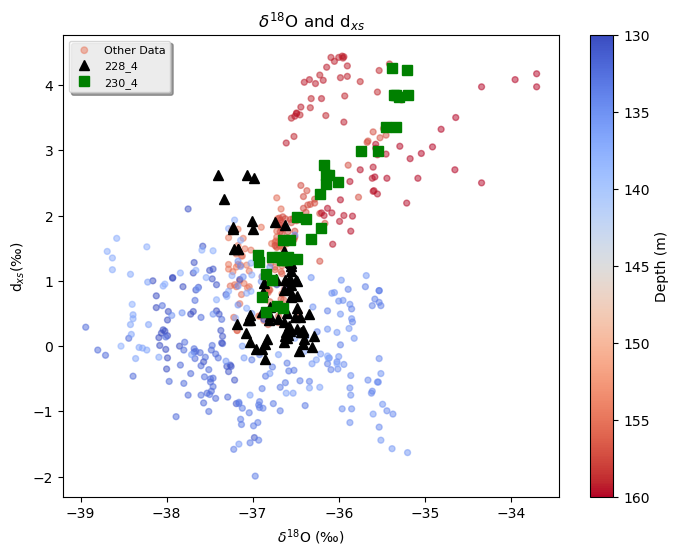

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/909529694.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


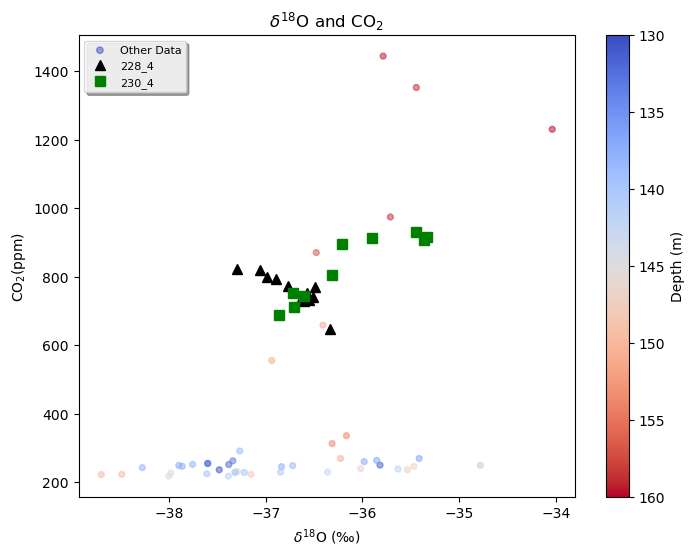

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/909529694.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


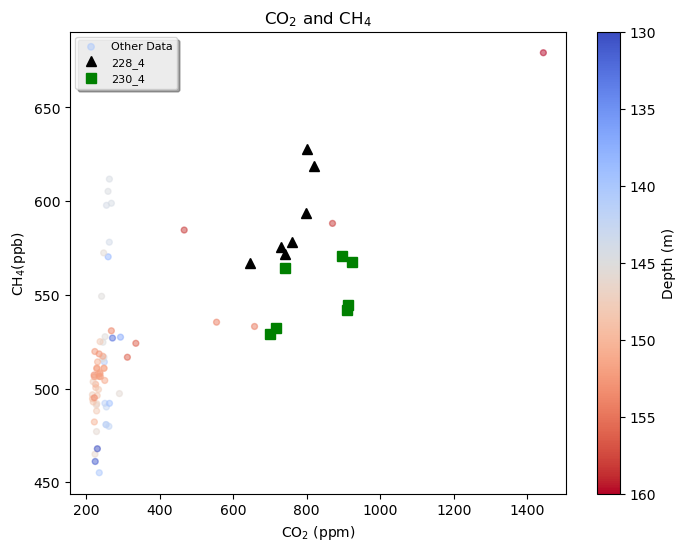

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/909529694.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


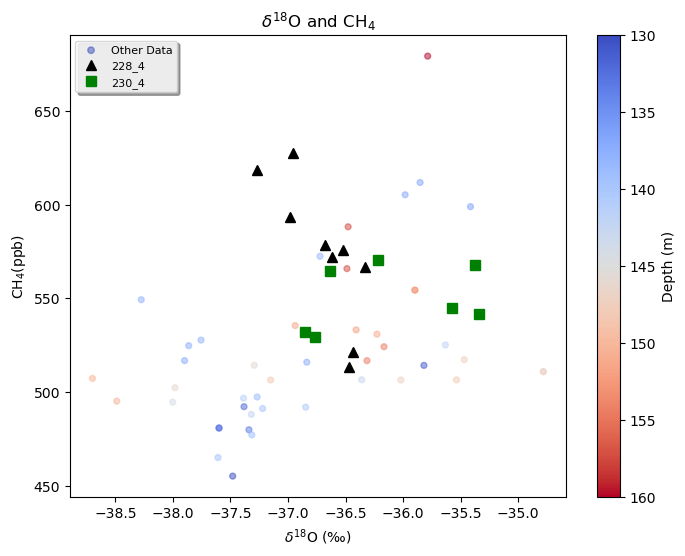

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:57: RuntimeWarning: Mean of empty slice
  new_p2_val.append(np.nanmean(p2))
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/3829027698.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[prox2] = new_p2_val
/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/909529694.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


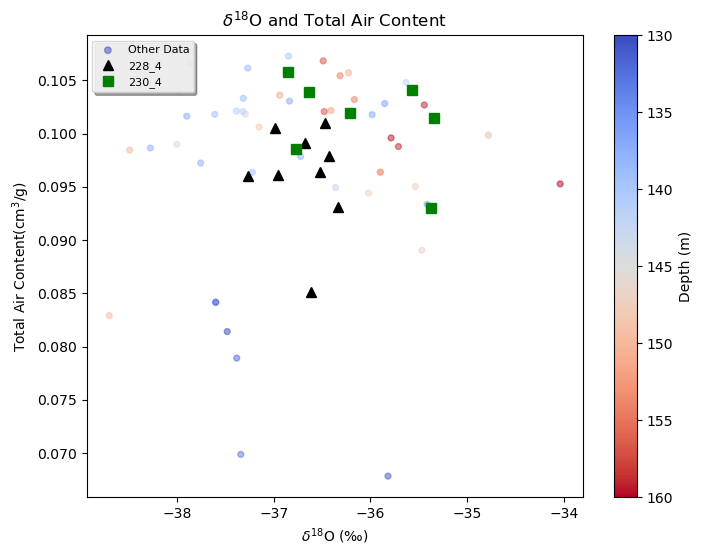

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_70270/909529694.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


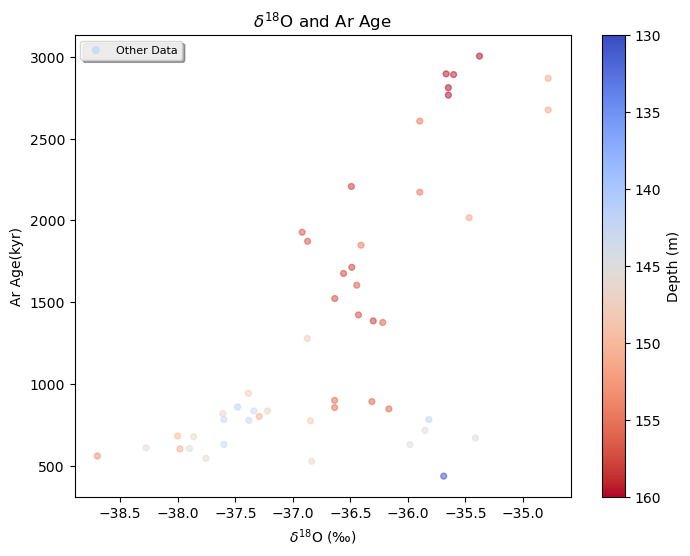

In [13]:
# Same plots - now with broader context data

combos = [
    ['d18O','dxs',False],
    ['co2','d18O',True],
    ['ch4','co2',True],
    ['ch4','d18O',True],
    ['tac','d18O',True],
    ['age','d18O',True],
]

for c in combos:
    fig, ax = plot_scatter_withbroader(samp_data,c[0],c[1],units,context_data,flipx=c[2])
    plt.show()
    fig.savefig(path_to_figures+'scatter/with_context/'+c[0]+'_'+c[1]+'.png', dpi=300)
    plt.close(fig)

## Plot with Depth

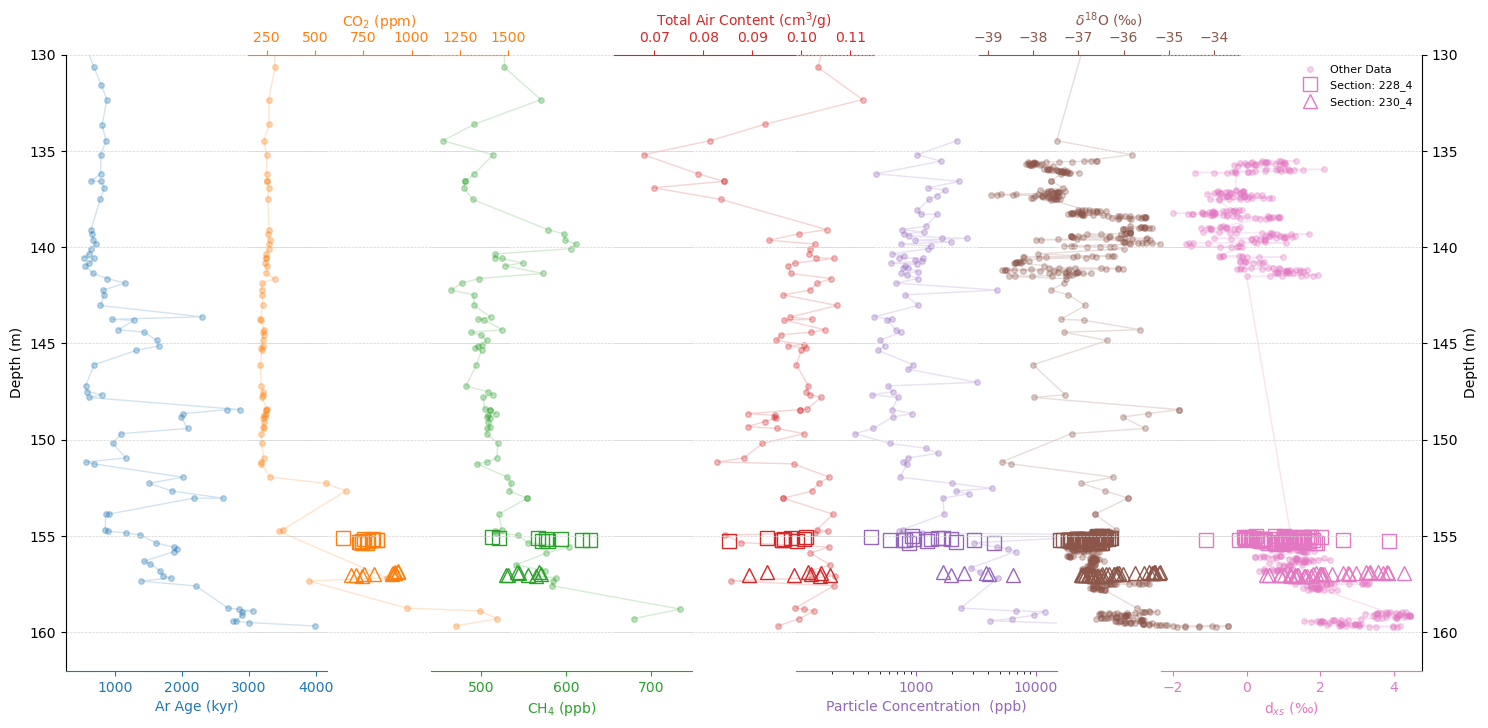

In [14]:
prox = ['age','co2','ch4','tac','concentration','d18O','dxs']
fig, ax = plt.subplots(1,len(prox),figsize=(2.5*len(prox), 8))

# make a list of attractive colors for the lines using a colormap
cmap = plt.get_cmap('tab10')

# plot each proxy - context data
for i, p in enumerate(prox):

    # filter for rows of df where the p column is not nan
    p_data = context_data[context_data[p].notna()]

    # order by depth
    p_data = p_data.sort_values(by='top_depth', ascending=False)

    # plot the data
    ax[i].plot(p_data[p], p_data['top_depth'], '.', color=cmap(i), alpha=0.3, label='Other Data',markersize=8)
    ax[i].plot(p_data[p], p_data['top_depth'], '-', color=cmap(i), alpha=0.2, linewidth=1, label='')

# plot each proxy - project data
secs = ['228_4','230_4']
for i, p in enumerate(prox):

    # check if p is a column in samp_data
    if p in samp_data.columns:

        # filter for rows of df where the p column is not nan
        p_data = samp_data[samp_data[p].notna()]

        # order by depth
        p_data = p_data.sort_values(by='top_depth_adj', ascending=False)

        # plot the data
        for sec,shape in zip(secs,['s','^']):

            sec_data = p_data[p_data['section'] == sec]

            ax[i].plot(sec_data[p], sec_data['top_depth_adj'], shape, color=cmap(i), linewidth=0.5, label='Section: '+sec, markerfacecolor='none',markersize=10)

# if prox is 'concentration', make the x axis log scale
for i, p in enumerate(prox):
    if p == 'concentration':
        ax[i].set_xscale('log')
        ax[i].set_xlim(100, 15000)
        ax[i].set_xticks([1000, 10000])
        ax[i].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# set y label
for a in [ax[0],ax[-1]]:
    a.set_ylabel('Depth (m)')

# set y axis limits
for a in ax:
    a.set_ylim(162, 130)

# move the y axis label, tickcs, and numbers to the right on the final subplot
ax[-1].yaxis.set_label_position('right')
ax[-1].yaxis.tick_right()


# add a light grey horizontal line accross the full width of the subplot at intervals of 5 m
for i in range(120, 170, 5):
    for a in ax:
        a.axhline(i, color='lightgrey', linewidth=0.5, linestyle='--')


# make every other x-axis label and scale at the top, not the bottom, of the graph
for i, a in enumerate(ax):
    if not i % 2 == 0:
        a.xaxis.set_ticks_position('top')
        a.xaxis.set_label_position('top')
        a.xaxis.tick_top()
        a.xaxis.set_tick_params(labeltop=True, labelbottom=False)
        a.spines['bottom'].set_visible(False)
    else:
        a.xaxis.set_ticks_position('bottom')
        a.xaxis.set_label_position('bottom')
        a.xaxis.tick_bottom()
        a.xaxis.set_tick_params(labeltop=False, labelbottom=True)
        a.spines['top'].set_visible(False)

# add x-axis labels
for i in range(len(prox)):
    unit_row = units.loc[units['simple_name'] == prox[i]]
    if len(unit_row) == 1:
        full_name = unit_row.latex_name.iloc[0]
        unit = unit_row.units.iloc[0]
    else:
        full_name = prox[i]
        unit = ''
    ax[i].set_xlabel(full_name + ' (' + unit + ')',color = cmap(i))

# make the x-axis ticks and numbers match the color of the xlabel
for i, a in enumerate(ax):
    a.tick_params(axis='x', colors=cmap(i))
    a.tick_params(axis='y', colors='black')
    a.spines['top'].set_color(cmap(i))
    a.spines['bottom'].set_color(cmap(i)) 

# remove spacing between subplots
fig.subplots_adjust(wspace=-0.3)

# make each subplot background transparent so points remain visible when overlapped
for a in ax:
    a.patch.set_alpha(0)

# add legend to the upper right  of the last subplot
ax[-1].legend(loc='upper right', fontsize=8, markerscale=1, frameon=False)

# delete y axis labels, ticks, vertical line, and numbers for subplots 1:-2
for a in ax[1:-1]:
    a.set_yticklabels([])
    a.set_yticks([])
    a.set_ylabel('')
for a in ax[1:]:
    a.spines['left'].set_visible(False)
for a in ax[:-1]:
    a.spines['right'].set_visible(False)

plt.show()